### ANN using Python
#### One hidden layer with 5 nodes
#### Hidden layer - tanh activation
#### Final layer - softmax for multiclass classification

In [ ]:
'''
Here are the columns ; 'user_action' is the label.

is_mobile,n_products_view,visit_durtion,is_returning_visitor,time_of_day,user_action 

=======
Feature
=======
is_mobile - 0/1
n_products_view - int > 0
visit_duration - real > 0
is_returning_visitor - 0/1
time_of_day -
0 - 12:00 - 6:00 am
1 - 6:00 am - 12:00 pm
2 - 12:00 pm - 6:00 pm
3 - 6:00 pm - 12:00 am

=======
Label
=======
User_Action - 
Binary - 1/0 (converted/not-converted)
MultiClass - 0/1/2/3 (bounce,add-to-cart,begin-checkout,finish-checkout)

'''

In [30]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# so scripts from other folders can import this file
# dir_path = os.path.abspath(os.path.dirname(os.path.realpath(__file__)))

# normalize numerical columns
# one-hot categorical columns

# df = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/My_Mini_Projects/NLP_Data/fake_or_real_news.csv')


def get_data():
  
    df = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/DataSets/ecommerce_data.csv')

  # just in case you're curious what's in it
    df.head()

  # easier to work with numpy array
    data = df.values

  # shuffle it
    np.random.shuffle(data)

  # split features and labels
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)
    
    # one-hot encode the categorical data
    # create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

      # one-hot
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

  
    # assign X2 back to X, since we don't need original anymore
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

    # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest
    

0 0.452070010079 0.494034310561
1000 0.0456315845869 0.0711717364944
2000 0.0272503956362 0.0677028049837
3000 0.0202667469966 0.0410573871711
4000 0.0131686968756 0.0345798467116
5000 0.010468019196 0.0387889969634
6000 0.00906929707829 0.0423638608907
7000 0.00797647943075 0.042962097751
8000 0.00702000167511 0.0439365812945
9000 0.00621771350012 0.0455611915589
Final train classification_rate: 0.995
Final test classification_rate: 0.95


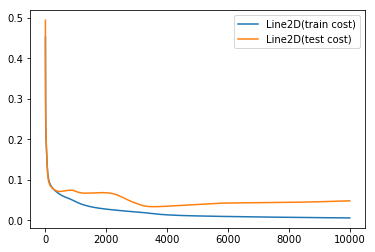

In [31]:
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

Xtrain, Ytrain, Xtest, Ytest = get_data()
D = Xtrain.shape[1]
K = len(set(Ytrain) | set(Ytest))
M = 5 # num hidden units

# convert to indicator
Ytrain_ind = y2indicator(Ytrain, K)
Ytest_ind = y2indicator(Ytest, K)

# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

# make predictions
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))


# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)

    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W2 -= learning_rate*Ztrain.T.dot(pYtrain - Ytrain_ind)
    b2 -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1 - Ztrain*Ztrain)
    W1 -= learning_rate*Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()